# Uczenie maszynowe

## Pobieranie zbiorów danych

In [1]:
# Aby pobrać dane, będziesz potrzebował połączenia z internetem.
# Pokazane polecenia zapisują większość zbiorów danych
# do tego rozdziału w katalogu roboczym

In [1]:
import pickle
import urllib
from sklearn.datasets import fetch_mldata
from sklearn.datasets import load_svmlight_file
from sklearn.datasets import fetch_covtype
from sklearn.datasets import fetch_20newsgroups

In [2]:
mnist = fetch_mldata("MNIST original")
pickle.dump(mnist, open( "mnist.pickle", "wb" ))

In [3]:
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with urllib.request.urlopen(target_page) as response:
    with open('ijcnn1.bz2','wb') as W:
        W.write(response.read())

In [4]:
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
cadata = load_svmlight_file(urllib.request.urlopen(target_page))
pickle.dump(cadata, open( "cadata.pickle", "wb" ))

In [5]:
covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
pickle.dump(covertype_dataset, open( "covertype_dataset.pickle", "wb" ))

In [6]:
newsgroups_dataset = fetch_20newsgroups(shuffle=True, remove=('headers', 'footers', 'quotes'), random_state=6)
pickle.dump(newsgroups_dataset, open( "newsgroups_dataset.pickle", "wb" ))

## Regresja liniowa i logistyczna

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, 
                    boston.target, test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print ("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 3.84281058945


In [9]:
%timeit regr.fit(X_train, Y_train) 

The slowest run took 8.26 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.05 ms per loop
Compiler time: 0.14 s


In [10]:
import numpy as np
avg_price_house = np.average(boston.target)
high_priced_idx = (Y_train >= avg_price_house)
Y_train[high_priced_idx] = 1
Y_train[np.logical_not(high_priced_idx)] = 0
Y_train = Y_train.astype(np.int8)
high_priced_idx = (Y_test >= avg_price_house)
Y_test[high_priced_idx] = 1
Y_test[np.logical_not(high_priced_idx)] = 0
Y_test = Y_test.astype(np.int8)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.81      0.90      0.85        61
          1       0.82      0.68      0.75        41

avg / total       0.81      0.81      0.81       102



In [12]:
%timeit clf.fit(X_train, Y_train)

100 loops, best of 3: 3.29 ms per loop


## Naiwny klasyfikator bayesowski

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, 
                    iris.target, test_size=0.2, random_state=0)

In [14]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



In [16]:
%timeit clf.fit(X_train, Y_train)

1000 loops, best of 3: 733 µs per loop


## Algorytm k najbliższych sąsiadów

In [17]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [18]:
# Importowanie obiektu mnist
# wcześniej przetworzonego i zapisanego na dysku
import pickle
mnist = pickle.load(open( "mnist.pickle", "rb" ))

In [19]:
mnist.data, mnist.target = shuffle(mnist.data, mnist.target)

In [20]:
# Redukowanie wielkości zbioru danych (w przeciwnym razie czas pracy będzie zbyt długi)
mnist.data = mnist.data[:1000]
mnist.target = mnist.target[:1000]
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, 
                    mnist.target, test_size=0.8, random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# KNN: K=10, domyślna miara odległości (odległość euklidesowa)
clf = KNeighborsClassifier(3)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

        0.0       0.70      0.82      0.75        67
        1.0       0.55      0.99      0.70        89
        2.0       0.75      0.49      0.59        88
        3.0       0.61      0.82      0.70        89
        4.0       0.77      0.45      0.57        75
        5.0       0.71      0.43      0.54        79
        6.0       0.94      0.89      0.91        83
        7.0       0.85      0.82      0.83        94
        8.0       0.97      0.48      0.64        65
        9.0       0.50      0.63      0.56        71

avg / total       0.73      0.69      0.69       800



In [23]:
%timeit clf.fit(X_train, Y_train)

100 loops, best of 3: 3.77 ms per loop


In [24]:
%timeit clf.predict(X_test)

1 loop, best of 3: 224 ms per loop


## Zaawansowane algorytmy nieliniowe

### Używanie algorytmu SVM do klasyfikowania

In [25]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]

In [26]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
hypothesis = SVC(kernel='rbf', random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=5, scoring='accuracy')
print ("SVC z funkcją rbf -> trafność w walidacji krzyżowej: średnia = %0.3f \
odch. st. = %0.3f" % (np.mean(scores), np.std(scores)))

SVC z funkcją rbf -> trafność w walidacji krzyżowej: średnia = 0.910 odch. st. = 0.001


In [27]:
import pickle
covertype_dataset = pickle.load(open( "covertype_dataset.pickle", "rb" ))
covertype_X = covertype_dataset.data[:25000,:]
covertype_y = covertype_dataset.target[:25000] -1 

In [28]:
import numpy as np
covertypes = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
        'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print ('Pierwotny zbiór danych:', covertype_dataset.data.shape)
print ('Próbka:', covertype_X.shape)
print('Częstotliwość docelowych wartości:', list(zip(covertypes,np.bincount(covertype_y))))

Pierwotny zbiór danych: (581012, 54)
Próbka: (25000, 54)
Częstotliwość docelowych wartości: [('Spruce/Fir', 9107), ('Lodgepole Pine', 12122), ('Ponderosa Pine', 1583), ('Cottonwood/Willow', 120), ('Aspen', 412), ('Douglas-fir', 779), ('Krummholz', 877)]


In [29]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.svm import LinearSVC
hypothesis = LinearSVC(dual=False, class_weight='balanced')
cv_strata = StratifiedKFold(covertype_y, n_folds=3, shuffle=True, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=cv_strata, scoring='accuracy')
print ("LinearSVC -> trafność w walidacji krzyżowej: średnia = %0.3f \
odch. st. = %0.3f" % (np.mean(scores), np.std(scores)))

LinearSVC -> trafność w walidacji krzyżowej: średnia = 0.645 odch. st. = 0.007


### Używanie algorytmu SVM w regresji

In [30]:
import pickle
X_train, y_train = pickle.load(open( "cadata.pickle", "rb" ))
from sklearn.preprocessing import scale
first_rows = 2000
X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.0

In [31]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVR
hypothesis = SVR()
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, 
                        scoring='mean_absolute_error')
print ("SVR -> trafność w walidacji krzyżowej: średnia = %0.3f \
odch. st. = %0.3f" % (np.mean(scores), np.std(scores)))

SVR -> trafność w walidacji krzyżowej: średnia = -4.618 odch. st. = 0.347


### Dostrajanie algorytmu SVM

In [32]:
from sklearn.svm import SVC
from sklearn.grid_search import RandomizedSearchCV
X_train, y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]
hypothesis = SVC(kernel='rbf', random_state=101)
search_dict = {'C': [0.01, 0.1, 1, 10, 100], 
               'gamma': [0.1, 0.01, 0.001, 0.0001]}
search_func = RandomizedSearchCV(estimator=hypothesis, 
              param_distributions=search_dict, n_iter=10, scoring='accuracy',
              n_jobs=-1, iid=True, refit=True, cv=5, random_state=101)
search_func.fit(X_train, y_train)
print ('Najlepsze parametry %s' % search_func.best_params_)
print ('Trafność w walidacji krzyżowej: średnia = %0.3f' % search_func.best_score_)

Najlepsze parametry {'C': 100, 'gamma': 0.01}
Trafność w walidacji krzyżowej: średnia = 0.989


## Strategie oparte na zestawach

In [33]:
import pickle
covertype_dataset = pickle.load(open( "covertype_dataset.pickle", "rb" ))
print (covertype_dataset.DESCR)
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertypes = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
        'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.



### Bagging z użyciem słabych klasyfikatorów

In [34]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
hypothesis = BaggingClassifier(KNeighborsClassifier(n_neighbors=1), 
            max_samples=0.7, max_features=0.7, n_estimators=100)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, 
                         scoring='accuracy', n_jobs=-1)
print ("BaggingClassifier -> trafność w walidacji krzyżowej: średnia = %0.3f \
odch. st. = %0.3f" % (np.mean(scores), np.std(scores)))

BaggingClassifier -> trafność w walidacji krzyżowej: średnia = 0.793 odch. st. = 0.001


### Algorytmy Random Forests i Extra-Trees

In [35]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
%%time
hypothesis = RandomForestClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, 
                         cv=3, scoring='accuracy', n_jobs=-1)
print ("RandomForestClassifier -> trafność w walidacji krzyżowej: średnia = %0.3f \
odch. st. = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> trafność w walidacji krzyżowej: średnia = 0.809 odch. st. = 0.009
Wall time: 46.8 s


In [37]:
%%time
hypothesis = ExtraTreesClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, 
                         scoring='accuracy', n_jobs=-1)
print ("ExtraTreesClassifier -> trafność w walidacji krzyżowej: średnia = %0.3f \
odch. st. = %0.3f" % (np.mean(scores), np.std(scores)))

ExtraTreesClassifier -> trafność w walidacji krzyżowej: średnia = 0.821 odch. st. = 0.009
Wall time: 5.91 s


In [38]:
import pickle
from sklearn.preprocessing import scale
X_train, y_train = pickle.load(open( "cadata.pickle", "rb" ))
first_rows = 2000

In [39]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.
hypothesis = RandomForestRegressor(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, 
                         scoring='mean_absolute_error', n_jobs=-1)
print ("RandomForestClassifier -> trafność w walidacji krzyżowej: średnia = %0.3f \
odch. st. = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> trafność w walidacji krzyżowej: średnia = -4.642 odch. st. = 0.514


### Szacowanie prawdopodobieństwa z użyciem zestawów

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
hypothesis = RandomForestClassifier(n_estimators=100, random_state=101)
calibration = CalibratedClassifierCV(hypothesis, method='sigmoid', cv=5)
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertype_test_X = covertype_dataset.data[15000:25000,:]
covertype_test_y = covertype_dataset.target[15000:25000]

In [41]:
hypothesis.fit(covertype_X,covertype_y)
calibration.fit(covertype_X,covertype_y)
prob_raw = hypothesis.predict_proba(covertype_test_X)
prob_cal = calibration.predict_proba(covertype_test_X)

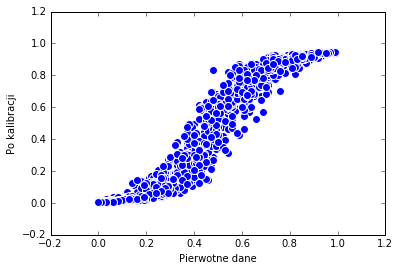

In [42]:
%matplotlib inline
tree_kind = covertypes.index('Ponderosa Pine')
probs = pd.DataFrame(list(zip(prob_raw[:,tree_kind],prob_cal[:,tree_kind])), 
        columns=['Pierwotne dane','Po kalibracji'])
plot = probs.plot(kind='scatter', x=0, y=1, s=64, c='blue', edgecolors='white')

### Sekwencje modeli: AdaBoost

In [43]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
hypothesis = AdaBoostClassifier(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, 
                         scoring='accuracy', n_jobs=-1)
print ("Adaboost -> trafność w walidacji krzyżowej: średnia = %0.3f \
odch. st. = %0.3f" % (np.mean(scores), np.std(scores)))

Adaboost -> trafność w walidacji krzyżowej: średnia = 0.622 odch. st. = 0.006


### Metoda GTB

In [44]:
import pickle
covertype_dataset = pickle.load(open( "covertype_dataset.pickle", "rb" ))
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000] -1 
covertype_val_X = covertype_dataset.data[15000:20000,:]
covertype_val_y = covertype_dataset.target[15000:20000] -1
covertype_test_X = covertype_dataset.data[20000:25000,:]
covertype_test_y = covertype_dataset.target[20000:25000] -1

In [45]:
import numpy as np
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
hypothesis = GradientBoostingClassifier(max_depth=5, 
                n_estimators=50, random_state=101)
hypothesis.fit(covertype_X, covertype_y)
#cv_strata = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=101)
#scores = cross_val_score(hypothesis, X_train, y_train, 
#                cv=cv_strata, scoring='accuracy', n_jobs=-1)
#print ("GradientBoostingClassifier -> trafność w walidacji krzyżowej: \
#średnia = %0.3f odch. st. = %0.3f" % (np.mean(scores), np.std(scores)))

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=101, subsample=1.0, verbose=0,
              warm_start=False)

In [46]:
from sklearn.metrics import accuracy_score
print ('GradientBoostingClassifier -> trafność na etapie testu:', 
       accuracy_score(covertype_test_y, hypothesis.predict(covertype_test_X)))

GradientBoostingClassifier -> trafność na etapie testu: 0.782


### XGBoost

In [47]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import cross_val_score, StratifiedKFold
import pickle
covertype_dataset = pickle.load(open( "covertype_dataset.pickle", "rb" ))
covertype_dataset.target = covertype_dataset.target.astype(int)
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000] -1 
covertype_val_X = covertype_dataset.data[15000:20000,:]
covertype_val_y = covertype_dataset.target[15000:20000] -1
covertype_test_X = covertype_dataset.data[20000:25000,:]
covertype_test_y = covertype_dataset.target[20000:25000] -1

In [48]:
import xgboost as xgb
hypothesis = xgb.XGBClassifier(objective= "multi:softprob",
    max_depth = 24, gamma=0.1, subsample = 0.90,
    learning_rate=0.01, n_estimators = 500, nthread=-1)

hypothesis.fit(covertype_X, covertype_y, eval_set=[(covertype_val_X, covertype_val_y)], 
               eval_metric='merror', early_stopping_rounds=25, verbose=False)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.1, learning_rate=0.01, max_delta_step=0, max_depth=24,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.9)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
print ('Trafność:', accuracy_score(covertype_test_y, hypothesis.predict(covertype_test_X)))
print (confusion_matrix(covertype_test_y, hypothesis.predict(covertype_test_X)))

Trafność: 0.848
[[1512  288    0    0    0    2   18]
 [ 215 2197   18    0    7   11    0]
 [   0   17  261    4    0   19    0]
 [   0    0    4   20    0    3    0]
 [   1   54    3    0   19    0    0]
 [   0   16   42    0    0   86    0]
 [  37    1    0    0    0    0  145]]


## Radzenie sobie z big data

### Tworzenie przykładowych dużych zbiorów danych

In [50]:
import numpy as np
import pickle
newsgroups_dataset = pickle.load(open( "newsgroups_dataset.pickle", "rb" ))
print ('Liczba wpisów w danych: %s' % np.shape(newsgroups_dataset.data))
print ('Średnia liczba słów na wpis:\
%0.0f' % np.mean([len(text.split(' ')) for text in newsgroups_dataset.data]))

Liczba wpisów w danych: 11314
Średnia liczba słów na wpis:206


In [51]:
# Uwaga - wykonywanie tej komórki może zająć sporo czasu
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10**5, n_features=5, 
                          n_informative=3, random_state=101)
D = np.c_[y,X]
np.savetxt('huge_dataset_10__5.csv', D, delimiter=",") 
# Zapisany plik powinien mieć ok. 14,6 MB
del(D, X, y)
X,y = make_classification(n_samples=10**6, n_features=5, 
                          n_informative=3, random_state=101)
D = np.c_[y,X]
np.savetxt('huge_dataset_10__6.csv', D, delimiter=",") 
# Zapisany plik powinien mieć ok. 146 MB
del(D, X, y)
X,y = make_classification(n_samples=10**7, n_features=5, 
                          n_informative=3, random_state=101)
D = np.c_[y,X]
np.savetxt('huge_dataset_10__7.csv', D, delimiter=",") 
# Zapisany plik powinien mieć ok. 1,46 GB
del(D, X, y)

### Skalowalność ze względu na ilość danych

In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
streaming = pd.read_csv('huge_dataset_10__7.csv', 
                        header=None, chunksize=10000)
learner = SGDClassifier(loss='log')
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
cumulative_accuracy = list()
for n,chunk in enumerate(streaming):
    if n == 0:
            minmax_scaler.fit(chunk.ix[:,1:].values)
    X = minmax_scaler.transform(chunk.ix[:,1:].values)
    X[X>1] = 1
    X[X<0] = 0  
    y = chunk.ix[:,0]
    if n > 8 :
        cumulative_accuracy.append(learner.score(X,y))
    learner.partial_fit(X,y,classes=np.unique(y))
print ('Średnia trafność w walidacji progresywnej \
%0.3f' % np.mean(cumulative_accuracy))

Średnia trafność w walidacji progresywnej 0.660


## Radzenie sobie z szybkością napływu danych

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import pandas as pd
from datetime import datetime
classifiers  = {
'SGDClassifier z funkcją straty hinge' : SGDClassifier(loss='hinge', random_state=101),
'SGDClassifier z funkcją straty log' : SGDClassifier(loss='log', random_state=101),
'Perceptron' : Perceptron(random_state=101),
'BernoulliNB' : BernoulliNB(),
'PassiveAggressiveClassifier' : PassiveAggressiveClassifier(random_state=101)
}
huge_dataset = 'huge_dataset_10__6.csv'
for algorithm in classifiers:
    start = datetime.now()
    minmax_scaler = MinMaxScaler(feature_range=(0, 1))
    streaming = pd.read_csv(huge_dataset, header=None, chunksize=100)
    learner = classifiers[algorithm]
    cumulative_accuracy = list()
    for n,chunk in enumerate(streaming):
        y = chunk.ix[:,0]
        X = chunk.ix[:,1:]
        if n > 50 :
            cumulative_accuracy.append(learner.score(X,y))
        learner.partial_fit(X,y,classes=np.unique(y))
    elapsed_time = datetime.now() - start
    print (algorithm + ': średnia trafność %0.3f, czas pracy %s s' \
    % (np.mean(cumulative_accuracy),elapsed_time.total_seconds()))

SGDClassifier z funkcją straty hinge: średnia trafność 0.713, czas pracy 48.40729 s
BernoulliNB: średnia trafność 0.734, czas pracy 53.206495 s
PassiveAggressiveClassifier: średnia trafność 0.626, czas pracy 41.83891 s
Perceptron: średnia trafność 0.618, czas pracy 52.376941 s
SGDClassifier z funkcją straty log: średnia trafność 0.717, czas pracy 43.017697 s


### Radzenie sobie z różnorodnością

In [54]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import HashingVectorizer
def streaming():
    for response, item in zip(newsgroups_dataset.target, newsgroups_dataset.data):
        yield response, item
hashing_trick = HashingVectorizer(stop_words='english', norm = 'l2', non_negative=True)
learner = SGDClassifier(random_state=101)
texts = list()
targets = list()
for n,(target, text) in enumerate(streaming()):
    texts.append(text)
    targets.append(target)
    if n % 1000 == 0 and n >0:
        learning_chunk = hashing_trick.transform(texts)
        if n > 1000:
            last_validation_score = learner.score(learning_chunk, targets),
        learner.partial_fit(learning_chunk, targets, classes=[k for k in range(20)])
        texts, targets = list(), list()
print ('Wynik ostatniej walidacji: %0.3f' % last_validation_score)

Wynik ostatniej walidacji: 0.724


In [55]:
New_text = ['A 2014 red Toyota Prius v Five with fewer than 14K miles. Powered by a reliable 1.8L four cylinder hybrid engine that averages 44mpg in the city and 40mpg on the highway.']
text_vector = hashing_trick.transform(New_text)
print (np.shape(text_vector), type(text_vector))
print ('Prognozowana grupa dyskusyjna: %s' % newsgroups_dataset.target_names[learner.predict(text_vector)[0]])

(1, 1048576) <class 'scipy.sparse.csr.csr_matrix'>
Prognozowana grupa dyskusyjna: rec.autos


## Krótkie omówienie przetwarzania języka naturalnego

### Podział na tokeny

In [56]:
my_text = "The sexy job in the next 10 years will be statisticians. People think I'm joking, but who would've guessed that computer engineers would've been the sexy job of the 1990s?"
simple_tokens = my_text.split(' ')
print (simple_tokens)

['The', 'sexy', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians.', 'People', 'think', "I'm", 'joking,', 'but', 'who', "would've", 'guessed', 'that', 'computer', 'engineers', "would've", 'been', 'the', 'sexy', 'job', 'of', 'the', '1990s?']


Gdy w trakcie korzystania z pakietu package natrafisz na błąd: “Resource u'tokenizers/punkt/english.pickle' not found.”, wywołaj w konsoli instrukcję: nltk.download() 
i pobierz wszystkie zasoby; możesz też pobrać sam brakujący zasób, który
spowodował wyświetlenie ostrzeżenia.

In [58]:
import nltk
nltk_tokens = nltk.word_tokenize(my_text)
print (nltk_tokens)

['The', 'sexy', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians', '.', 'People', 'think', 'I', "'m", 'joking', ',', 'but', 'who', 'would', "'ve", 'guessed', 'that', 'computer', 'engineers', 'would', "'ve", 'been', 'the', 'sexy', 'job', 'of', 'the', '1990s', '?']


In [59]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer(strip_handles=True, reduce_len=True)

tweet = '@mate: I loooooooove this city!!!!!!! #love #foreverhere'
tt.tokenize(tweet)

[':', 'I', 'looove', 'this', 'city', '!', '!', '!', '#love', '#foreverhere']

### Stemming

In [60]:
from nltk.stem import *
stemmer = LancasterStemmer()
print ([stemmer.stem(word) for word in nltk_tokens])

['the', 'sexy', 'job', 'in', 'the', 'next', '10', 'year', 'wil', 'be', 'stat', '.', 'peopl', 'think', 'i', "'m", 'jok', ',', 'but', 'who', 'would', "'ve", 'guess', 'that', 'comput', 'engin', 'would', "'ve", 'been', 'the', 'sexy', 'job', 'of', 'the', '1990s', '?']


### Oznaczanie części mowy

In [61]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tomek\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [62]:
print (nltk.pos_tag(nltk_tokens))

[('The', 'DT'), ('sexy', 'JJ'), ('job', 'NN'), ('in', 'IN'), ('the', 'DT'), ('next', 'JJ'), ('10', 'CD'), ('years', 'NNS'), ('will', 'MD'), ('be', 'VB'), ('statisticians', 'NNS'), ('.', '.'), ('People', 'NNS'), ('think', 'VBP'), ('I', 'PRP'), ("'m", 'VBP'), ('joking', 'VBG'), (',', ','), ('but', 'CC'), ('who', 'WP'), ('would', 'MD'), ("'ve", 'VBP'), ('guessed', 'VBN'), ('that', 'IN'), ('computer', 'NN'), ('engineers', 'NNS'), ('would', 'MD'), ("'ve", 'VBP'), ('been', 'VBN'), ('the', 'DT'), ('sexy', 'JJ'), ('job', 'NN'), ('of', 'IN'), ('the', 'DT'), ('1990s', 'CD'), ('?', '.')]


### Rozpoznawanie nazw własnych

In [63]:
text = "Elvis Aaron Presley was an American singer and actor. Born in Tupelo, Mississippi, when Presley was 13 years old he and his family relocated to Memphis, Tennessee."
chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text)))
print (chunks)

(S
  (PERSON Elvis/NNP)
  (PERSON Aaron/NNP Presley/NNP)
  was/VBD
  an/DT
  (GPE American/JJ)
  singer/NN
  and/CC
  actor/NN
  ./.
  Born/VBN
  in/IN
  (GPE Tupelo/NNP)
  ,/,
  (GPE Mississippi/NNP)
  ,/,
  when/WRB
  (PERSON Presley/NNP)
  was/VBD
  13/CD
  years/NNS
  old/JJ
  he/PRP
  and/CC
  his/PRP$
  family/NN
  relocated/VBD
  to/TO
  (GPE Memphis/NNP)
  ,/,
  (GPE Tennessee/NNP)
  ./.)


### Stop-słowa

In [64]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
print (stop_words)

frozenset({'hundred', 'wherein', 'whoever', 'an', 'because', 'him', 'i', 'whereupon', 'if', 'he', 'move', 'nothing', 'bottom', 'everywhere', 'may', 'thus', 'you', 'or', 'latter', 'be', 'twenty', 'hereby', 'no', 'the', 'fifteen', 'down', 'not', 'please', 'itself', 'all', 'sometimes', 'thereafter', 'fill', 'full', 'such', 'else', 'three', 'out', 'well', 'thin', 'via', 'here', 'herein', 'back', 'noone', 'do', 'describe', 'who', 'why', 'hers', 'through', 'is', 'nobody', 'they', 'their', 'therein', 'next', 'eight', 'show', 'that', 'upon', 'further', 'many', 'up', 'which', 'never', 'themselves', 'one', 'another', 'myself', 'fire', 'nine', 'amoungst', 'couldnt', 'it', 'anyone', 'our', 'whenever', 'thence', 'hereupon', 'either', 'seems', 'sincere', 'until', 'above', 'how', 'this', 'whereby', 'along', 'whom', 'around', 'detail', 'done', 'due', 'wherever', 'each', 'besides', 'without', 'to', 'seem', 'moreover', 'take', 'should', 'ltd', 'been', 'about', 'whither', 'anywhere', 'onto', 'inc', 'else

In [65]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [66]:
print(stopwords.words('german'))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euch', 'im'

### Kompletny przykład z obszaru nauki o danych - klasyfikowanie tekstu

In [67]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'sci.space']
to_remove = ('headers', 'footers', 'quotes')
twenty_sci_news_train = fetch_20newsgroups(subset='train', remove=to_remove, categories=categories)
twenty_sci_news_test = fetch_20newsgroups(subset='test', remove=to_remove, categories=categories)

In [68]:
tf_vect = TfidfVectorizer()
X_train = tf_vect.fit_transform(twenty_sci_news_train.data)
X_test = tf_vect.transform(twenty_sci_news_test.data)
Y_train = twenty_sci_news_train.target
Y_test = twenty_sci_news_test.target

In [69]:
clf = SGDClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print ("Trafność =", accuracy_score(Y_test, Y_pred))

Trafność = 0.889873417722


In [70]:
def clean_and_stem_text(text):
    tokens = nltk.word_tokenize(text.lower())
    clean_tokens = [word for word in tokens if word not in stop_words]
    stem_tokens = [stemmer.stem(token) for token in clean_tokens]
    return " ".join(stem_tokens)
cleaned_docs_train = [clean_and_stem_text(text) for text in twenty_sci_news_train.data]
cleaned_docs_test = [clean_and_stem_text(text) for text in twenty_sci_news_test.data]

In [71]:
X1_train = tf_vect.fit_transform(cleaned_docs_train)
X1_test = tf_vect.transform(cleaned_docs_test)
clf.fit(X1_train, Y_train)
Y1_pred = clf.predict(X1_test)
print ("Trafność =", accuracy_score(Y_test, Y1_pred))

Trafność = 0.884810126582


## Przegląd technik uczenia nienadzorowanego

In [72]:
%matplotlib inline

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [74]:
N_samples = 2000
dataset_1 = np.array(datasets.make_circles(n_samples=N_samples, noise=0.05, factor=0.3)[0])
dataset_2 = np.array(datasets.make_blobs(n_samples=N_samples, centers=4, cluster_std=0.4, random_state=0)[0])

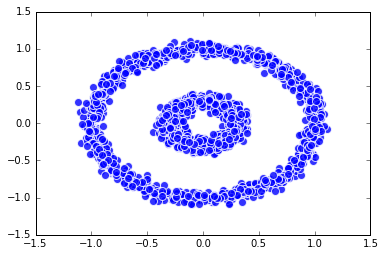

In [75]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c='blue', alpha=0.8, s=64, edgecolors='white')
plt.show()

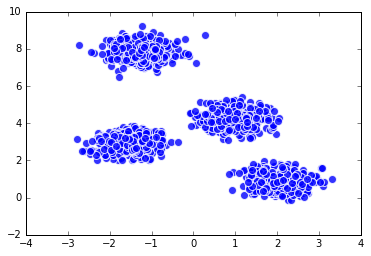

In [76]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], alpha=0.8, s=64, c='blue', edgecolors='white')
plt.show()

In [77]:
from sklearn.cluster import KMeans
K_dataset_1 = 2
km_1 = KMeans(n_clusters=K_dataset_1)
labels_1 = km_1.fit(dataset_1).labels_

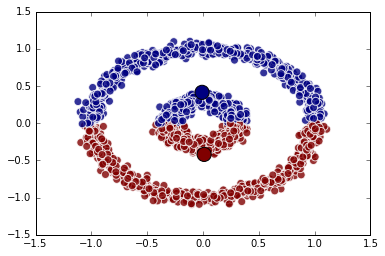

In [78]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], s=200, c=np.unique(labels_1), edgecolors='black')
plt.show()

In [79]:
K_dataset_2 = 4
km_2 = KMeans(n_clusters=K_dataset_2)
labels_2 = km_2.fit(dataset_2).labels_

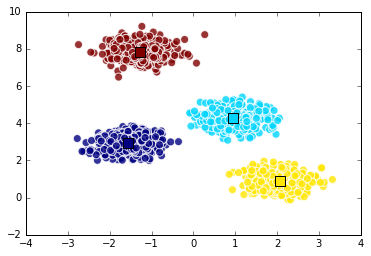

In [80]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], marker='s', s=100, c=np.unique(labels_2), edgecolors='black')
plt.show()

In [81]:
from sklearn.cluster import DBSCAN
dbs_1 = DBSCAN(eps=0.4)
labels_1 = dbs_1.fit(dataset_1).labels_

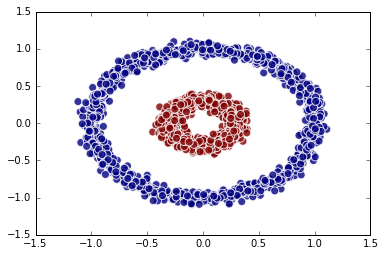

In [82]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, alpha=0.8, s=64, edgecolors='white')
plt.show()

In [83]:
np.unique(labels_1)

array([0, 1], dtype=int64)

In [84]:
dbs_2 = DBSCAN(eps=0.5)
labels_2 = dbs_2.fit(dataset_2).labels_

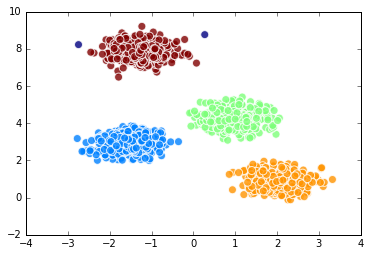

In [85]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, alpha=0.8, s=64, edgecolors='white')
plt.show()

In [86]:
np.unique(labels_2)

array([-1,  0,  1,  2,  3], dtype=int64)

## LDA

In [87]:
import nltk
import gensim
from sklearn.datasets import fetch_20newsgroups

def tokenize(text):
    return [token.lower() for token in gensim.utils.simple_preprocess(text) 
            if token not in gensim.parsing.preprocessing.STOPWORDS]

text_dataset = fetch_20newsgroups(categories=['rec.autos', 
                                              'sci.med'], 
                                  random_state=101,
                                  remove=('headers', 'footers', 
                                          'quotes'))


documents = text_dataset.data
print("Liczba dokumentów:", len(documents))

c:\Users\tomek\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Liczba dokumentów: 1188


In [88]:
documents[0]

'\nI have a new doctor who gave me a prescription today for something called \nSeptra DS.  He said it may cause GI problems and I have a sensitive stomach \nto begin with.  Anybody ever taken this antibiotic.  Any good?  Suggestions \nfor avoiding an upset stomach?  Other tips?\n'

In [89]:
processed_docs = [tokenize(doc) for doc in documents]
word_dic = gensim.corpora.Dictionary(processed_docs)
print("Liczba tokenów:", len(word_dic))

Liczba tokenów: 16161


In [90]:
word_dic.filter_extremes(no_below=10, no_above=0.2)
bow = [word_dic.doc2bow(doc) for doc in processed_docs]

In [91]:
lda_model = gensim.models.LdaMulticore(bow, num_topics=2, 
                                       id2word=word_dic, passes=10, 
                                       iterations=500)

In [92]:
lda_model.print_topics(-1)

[(0,
  '0.015*"edu" + 0.010*"com" + 0.009*"people" + 0.006*"time" + 0.006*"msg" + 0.006*"think" + 0.006*"food" + 0.006*"doctor" + 0.005*"good" + 0.005*"pain"'),
 (1,
  '0.020*"car" + 0.008*"new" + 0.008*"cars" + 0.008*"use" + 0.007*"health" + 0.006*"good" + 0.005*"time" + 0.005*"think" + 0.005*"engine" + 0.005*"year"')]

In [93]:
new_doc = "I've shown the doctor my new car. He loved its big wheels!"

bow_doc = word_dic.doc2bow(tokenize(new_doc))
for index, score in sorted(lda_model[bow_doc], key=lambda tup: -1*tup[1]):
    print("Wynik: {}\t Temat: {}".format(score, lda_model.print_topic(index, 5)))

Wynik: 0.5644191990162971	 Temat: 0.020*"car" + 0.008*"new" + 0.008*"cars" + 0.008*"use" + 0.007*"health"
Wynik: 0.4355808009837029	 Temat: 0.015*"edu" + 0.010*"com" + 0.009*"people" + 0.006*"time" + 0.006*"msg"


# Word2Vec

In [94]:
from nltk.corpus import movie_reviews
from gensim.models import Word2Vec
w2v = Word2Vec(movie_reviews.sents(), workers=4)
w2v.init_sims(replace=True)

In [95]:
w2v.most_similar('house', topn=5)

[('body', 0.8885724544525146),
 ('gun', 0.8770157098770142),
 ('apartment', 0.8759454488754272),
 ('party', 0.8690564632415771),
 ('country', 0.868741512298584)]

In [96]:
w2v.most_similar('countryside', topn=5)

[('union', 0.9333622455596924),
 ('instantaneously', 0.9290856719017029),
 ('sessions', 0.9281014204025269),
 ('loner', 0.9270448088645935),
 ('protected', 0.9257776737213135)]

In [97]:
w2v['countryside']

array([  7.62483338e-03,  -8.83215517e-02,   1.74209997e-01,
         4.39470746e-02,   1.95734035e-02,   4.17386852e-02,
         2.66464055e-01,  -5.17177023e-02,  -1.09548703e-01,
         6.74090385e-02,   1.26378201e-02,   2.61347126e-02,
         1.35651410e-01,  -6.63510337e-02,  -1.05151743e-01,
        -6.21871166e-02,   2.45001186e-02,   7.26276785e-02,
         7.26784468e-02,   1.41042307e-01,  -9.57392082e-02,
         8.48430116e-03,   7.84904882e-02,   1.10989191e-01,
        -2.23767757e-01,   7.54587278e-02,   2.01429769e-01,
        -3.90000944e-03,  -9.38464422e-03,   1.15490034e-01,
         4.58892025e-02,  -6.23791330e-02,  -9.09038782e-02,
         3.75544839e-02,  -6.76246919e-03,  -1.24810882e-01,
        -1.93935245e-01,   1.21531468e-02,  -6.96981028e-02,
         8.08674246e-02,  -6.78564236e-02,  -1.75444886e-01,
         1.51197165e-01,  -1.02521434e-01,   6.81451634e-02,
         3.03248037e-02,  -1.91933393e-01,   8.38393532e-03,
        -6.58319965e-02,

In [98]:
w2v.most_similar(positive=['woman', 'king'], negative=['queen'], topn=3)

[('man', 0.8458656072616577),
 ('boy', 0.7745509147644043),
 ('girl', 0.7647771835327148)]

In [99]:
w2v.doesnt_match(['bed', 'pillow', 'cake', 'mattress'])

'cake'

In [100]:
w2v.similarity('woman', 'girl'), w2v.similarity('woman', 'boy')

(0.9038730912362628, 0.83002170498343864)